<h2><center> Welcome to the Landslide Prediction Challenge</h2></center>

A landslide is the movement of a mass of rock, debris, or earth(soil) down a slope. As a common natural hazard, it can lead to significant losses of human lives and properties.


Hong Kong, one of the hilly and densely populated cities in the world, is frequently affected by extreme rainstorms, making it highly susceptible to rain-induced natural terrain landslides

<img src = "https://drive.google.com/uc?export=view&id=1-8sSI75AG3HM89nDJEwo6_KJbAEUXS-r">

The common practice of identifying landslides is visual interpretation which, however, is labor-intensive and time-consuming.

***Thus, this hack will focus on automating the landslide identification process using artificial intelligence techniques***

This will be achieved by using high-resolution terrain information to perform the terrain-based landslide identification. Other auxiliary data such as the lithology of the surface materials and rainfall intensification factor are also provided.


**Table of contents:**

1. [Import relevant libraries](#Libraries)
2. [Load files](#Load)
3. [Preview files](#Preview)
4. [Data dictionary](#Dictionary)
5. [Exploratory Data Analysis](#Exploration)
6. [Outliers](#Outliers)
7. [Correlations](#Correlations)
8. [Model training](#Model)
9. [Test set predictions](#Predictions)
10. [Creating a submission file](#Submission)
11. [Tips to improve model performance](#Tips)

<a name = "Libraries"></a>
### 1. Import relevant libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# for Q-Q plots
import scipy.stats as stats
from sklearn.metrics import f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
import catboost as cb
import xgboost as xgb
import lightgbm as lgbm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import plot_roc_curve, precision_recall_curve
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')

<a name = "Load"></a>
### 2. Load files

In [2]:
# Read files to pandas dataframes
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample_submission = pd.read_csv('SampleSubmission.csv')

<a name = "Preview"></a>
### 3. Preview files

In [3]:
# check the first 5 rows of the train set
train.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
0,1,130,129,127,126,123,126,125,124,122,119,122,121,119,117,115,119,117,115,114,112,116,114,113,111,110,35.26439,37.29208,33.85452,35.79576,40.31554,38.87666,39.50971,40.51059,45.83452,45.00000,36.05503,40.51059,44.56372,41.81031,38.87666,33.85452,38.87666,33.85452,33.85452,32.63194,32.63194,30.24626,30.24626,30.24626,30.24626,98.1301,113.1986,116.5650,123.6901,135.0000,97.12502,104.0362,110.5560,119.0546,126.8699,105.9454,110.5560,113.9625,116.5650,119.7449,116.5650,119.7449,116.5650,116.5650,128.6598,128.6598,120.9638,120.9638,120.9638,120.9638,0.038514,0.029463,0.031405,0.025771,0.010453,0.028321,0.027360,0.019831,0.009338,0.008806,0.021451,0.021244,0.017273,0.006708,-0.008671,0.023851,0.012586,-0.004249,0.003646,-0.006809,0.013328,0.005337,0.007039,-0.017753,-0.007777,0.013903,0.014674,0.018249,0.018368,0.003341,0.002023,0.005743,0.002238,-0.003820,-0.003302,-0.002141,0.003585,0.002025,-0.012269,-0.027184,0.000977,-0.012630,-0.031644,-0.025683,-0.037371,-0.018934,-0.021875,-0.023553,-0.048495,-0.039092,8.045186,8.333038,7.819405,8.032228,9.818933,9.295772,9.375107,9.499450,10.922910,11.001900,9.339861,9.883230,11.035840,10.298030,9.618946,8.703197,10.175750,8.651121,8.251134,8.074524,8.519887,7.989215,7.634287,7.804186,7.219216,3.173340,2.961406,3.315935,3.061250,3.246914,3.221661,3.153512,3.048637,2.915506,3.073973,3.765278,3.246664,3.154479,3.237765,3.392537,3.851345,3.673898,3.821337,3.584646,3.734637,4.003083,4.218082,3.990867,4.100921,3.715154,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1.281767,1.281743,1.281708,1.281684,1.281649,1.281780,1.281757,1.281721,1.281698,1.281662,1.281789,1.281765,1.281730,1.281707,1.281671,1.281802,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.281752,1.281

In [4]:
# check the first 5 rows of the test set
test.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
0,10865,111,109,109,110,112,117,114,113,112,113,120,120,118,116,115,122,122,122,121,120,122,122,121,121,123,45.83452,36.055030,27.01712,22.98977,27.01712,43.49152,49.490830,42.67464,30.96376,22.98977,27.017120,39.509710,44.56372,43.49152,35.26439,12.604380,11.309930,17.54840,28.30320,38.87666,5.710593,5.710593,8.049467,12.60438,26.56505,240.9454,254.05460,281.30990,315.00000,348.69010,251.56500,250.01690,257.47120,270.00000,315.00000,281.30990,255.96380,246.03750,251.56500,278.130100,296.56510,270.00000,251.56500,248.19860,277.125000,360.00000,180.00000,135.00000,333.43490,306.86990,0.035766,-0.013152,-0.037572,-0.062401,-0.055791,0.027593,0.002834,-0.038738,-0.052596,-0.035428,0.031410,0.010285,-0.030370,-0.047145,-0.030835,0.060269,0.010774,-0.009391,-0.030129,-0.029237,0.088753,0.075792,0.023841,-0.001485,-0.010110,-0.016483,-0.044767,-0.042420,-0.053476,-0.043530,0.008279,0.002710,-0.010917,-0.013603,-0.011500,0.026537,0.017282,-0.005495,-0.016250,-0.016121,0.074879,0.055460,0.042507,0.019065,-0.003870,0.024342,0.042834,0.056148,0.040106,0.021167,9.667106,8.181493,7.782584,8.776177,10.954420,8.896092,11.257830,10.227420,10.278770,8.030625,5.094675,8.138618,10.002860,11.459460,9.746919,1.718303,1.830190,4.348740,5.784863,10.840700,0.664827,0.000081,0.000261,0.846584,4.815838,2.682646,4.814003,6.252043,6.667844,6.602260,2.240095,2.561107,3.066897,5.311826,6.215635,2.774525,2.446323,2.663095,3.096692,4.132727,2.930157,4.044015,3.533233,2.135064,4.028785,4.076646,8.517193,9.857834,5.307338,3.319677,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1.310570,1.310638,1.310684,1.310752,1.310797,1.310388,1.310456,1.310502,1.310570,1.310616,1.310266,1.310335,1.310381,1.310449,1.310495,1.310084,1.310153,1.310199,1.310267,

In [5]:
# Check how the submission file should look like
sample_submission.head()

,Sample_ID,Label
0,10865,0
1,10866,0
2,10867,0
3,10868,0
4,10869,0


<a name = "Dictionary"></a>
## 4. Data Dictionary
<figure>
<img src = "https://drive.google.com/uc?export=view&id=1T_XBSH6ozmhGiDz_nL4bQvvonHUpbCfW" height = "200">
<img src = "https://drive.google.com/uc?export=view&id=13nSrrIowiFPjAgiR--Nd4cHLVwvXFaFj" height = "400">

In [6]:
# check the shape and size of the train and test set
train.shape, test.shape, sample_submission.shape

((10864, 227), (5430, 226), (5430, 2))

<a name = "Exploration"></a>
### 5. Exploratory Data Analysis

In [7]:
# Check statistical summaries of the train set
train.describe()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,1086

 - There is a very high correlation between features extracted from the same location

<Figure size 1440x864 with 0 Axes>

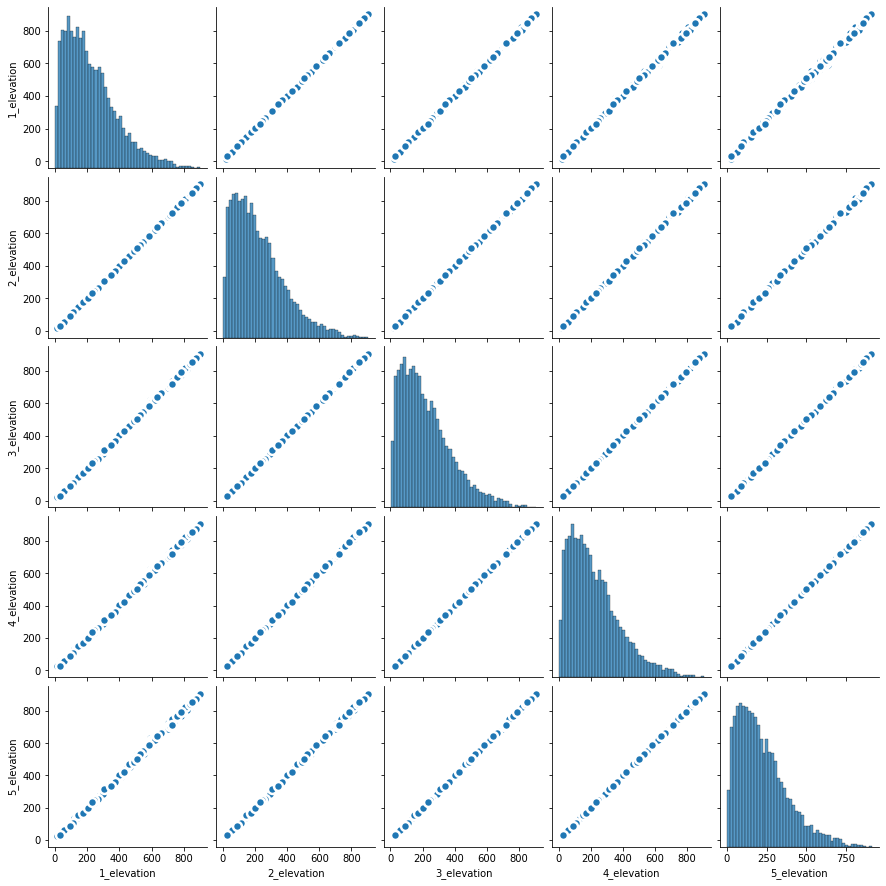

In [8]:
# Elevation correlations
plt.figure(figsize = (20, 12))
sample_elevations = ['1_elevation', '2_elevation', '3_elevation', '4_elevation', '5_elevation']
sns.pairplot(train[sample_elevations], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [9]:
# Check statistical summaries of the test set
test.describe()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
count,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5.430000e+03,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5.430000e+03,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.000000,5430.0000

In [10]:
# checj for any missing values
train.isnull().sum().any(), test.isnull().sum().any()

(False, False)

In [11]:
def dataoverview(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print('\nNumber of Features:', df.shape[1])
    print('\nFeatures:')
    print(train.columns.tolist())
    print("\nMissing Values:", df.isnull().sum().values.sum())
    print("\nUnique Values:")
    print(df.nunique())

In [12]:
# overview of the train dataset
dataoverview(train, 'Overview of the training data')

Overview of the training data:

Rows: 10864

Number of Features: 227

Features:
['Sample_ID', '1_elevation', '2_elevation', '3_elevation', '4_elevation', '5_elevation', '6_elevation', '7_elevation', '8_elevation', '9_elevation', '10_elevation', '11_elevation', '12_elevation', '13_elevation', '14_elevation', '15_elevation', '16_elevation', '17_elevation', '18_elevation', '19_elevation', '20_elevation', '21_elevation', '22_elevation', '23_elevation', '24_elevation', '25_elevation', '1_slope', '2_slope', '3_slope', '4_slope', '5_slope', '6_slope', '7_slope', '8_slope', '9_slope', '10_slope', '11_slope', '12_slope', '13_slope', '14_slope', '15_slope', '16_slope', '17_slope', '18_slope', '19_slope', '20_slope', '21_slope', '22_slope', '23_slope', '24_slope', '25_slope', '1_aspect', '2_aspect', '3_aspect', '4_aspect', '5_aspect', '6_aspect', '7_aspect', '8_aspect', '9_aspect', '10_aspect', '11_aspect', '12_aspect', '13_aspect', '14_aspect', '15_aspect', '16_aspect', '17_aspect', '18_aspect',

In [13]:
def dataoverview(df, message):
    print(f'{message}:\n')
    print("Rows:", df.shape[0])
    print("\nNumber of Features:", df.shape[1])
    print("\nFeatures:")
    print(test.columns.tolist())
    print("\nMissing Values:", df.isnull().sum().values.sum())
    print("\nUnique Values:")
    print(df.nunique())

In [14]:
dataoverview(test, 'Overview of the test dataset')

Overview of the test dataset:

Rows: 5430

Number of Features: 226

Features:
['Sample_ID', '1_elevation', '2_elevation', '3_elevation', '4_elevation', '5_elevation', '6_elevation', '7_elevation', '8_elevation', '9_elevation', '10_elevation', '11_elevation', '12_elevation', '13_elevation', '14_elevation', '15_elevation', '16_elevation', '17_elevation', '18_elevation', '19_elevation', '20_elevation', '21_elevation', '22_elevation', '23_elevation', '24_elevation', '25_elevation', '1_slope', '2_slope', '3_slope', '4_slope', '5_slope', '6_slope', '7_slope', '8_slope', '9_slope', '10_slope', '11_slope', '12_slope', '13_slope', '14_slope', '15_slope', '16_slope', '17_slope', '18_slope', '19_slope', '20_slope', '21_slope', '22_slope', '23_slope', '24_slope', '25_slope', '1_aspect', '2_aspect', '3_aspect', '4_aspect', '5_aspect', '6_aspect', '7_aspect', '8_aspect', '9_aspect', '10_aspect', '11_aspect', '12_aspect', '13_aspect', '14_aspect', '15_aspect', '16_aspect', '17_aspect', '18_aspect', '

In [15]:
# Check for duplicates
train.duplicated().any(), test.duplicated().any()

(False, False)

There are no missing values in both the train and test dataset.

#### 3.1 Target variable distribution

In [16]:
# Check distribution of the target variabe
train.Label.value_counts(normalize = True)

0    0.75
1    0.25
Name: Label, dtype: float64

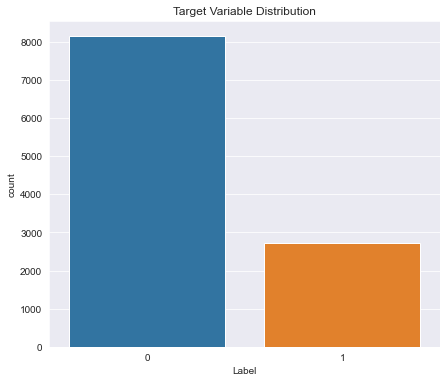

In [17]:
sns.set_style('darkgrid')
plt.figure(figsize=(7, 6))
sns.countplot(x = train.Label)
plt.title('Target Variable Distribution')
plt.show()

In [18]:
train['Label'].value_counts()

0    8148
1    2716
Name: Label, dtype: int64

The dataset is highly imbalanced with the majority class having 75% and the minority class 25%

In [19]:
# Check the shape of the train and test dataset
print(f'The shape of the train dataset is: {train.shape}\nThe shape of the test dataset is: {test.shape}')

The shape of the train dataset is: (10864, 227)
The shape of the test dataset is: (5430, 226)


In [20]:
# check the information of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10864 entries, 0 to 10863
Columns: 227 entries, Sample_ID to Label
dtypes: float64(175), int64(52)
memory usage: 18.8 MB


Do the same users repeat in the train set?

In [21]:
train['Sample_ID'].value_counts().max()

1

Do the same users repeat in the test set?

In [22]:
test['Sample_ID'].value_counts().max()

1

Do the same users repeat in the train and test set?

In [23]:
set(train['Sample_ID'].unique()).intersection(set(test['Sample_ID'].unique()))

set()

### Combine train and test set for easy preprocessing

In [24]:
# combine both train and test set
ntrain = train.shape[0] # to be used to split the train and test set from the combined dataframe 

train['source'] = 'train'
test['source'] = 'test'

alldata = pd.concat((train, test)).reset_index(drop=True)
print(f'The shape of the combined dataframe is: {alldata.shape}')
print(train.shape, test.shape, alldata.shape)

The shape of the combined dataframe is: (16294, 228)
(10864, 228) (5430, 227) (16294, 228)


In [25]:
# Preview the last five rows of the combined dataframe
alldata.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label,source
0,1,130,129,127,126,123,126,125,124,122,119,122,121,119,117,115,119,117,115,114,112,116,114,113,111,110,35.26439,37.29208,33.85452,35.79576,40.31554,38.87666,39.50971,40.51059,45.83452,45.00000,36.05503,40.51059,44.56372,41.81031,38.87666,33.85452,38.87666,33.85452,33.85452,32.63194,32.63194,30.24626,30.24626,30.24626,30.24626,98.1301,113.1986,116.5650,123.6901,135.0000,97.12502,104.0362,110.5560,119.0546,126.8699,105.9454,110.5560,113.9625,116.5650,119.7449,116.5650,119.7449,116.5650,116.5650,128.6598,128.6598,120.9638,120.9638,120.9638,120.9638,0.038514,0.029463,0.031405,0.025771,0.010453,0.028321,0.027360,0.019831,0.009338,0.008806,0.021451,0.021244,0.017273,0.006708,-0.008671,0.023851,0.012586,-0.004249,0.003646,-0.006809,0.013328,0.005337,0.007039,-0.017753,-0.007777,0.013903,0.014674,0.018249,0.018368,0.003341,0.002023,0.005743,0.002238,-0.003820,-0.003302,-0.002141,0.003585,0.002025,-0.012269,-0.027184,0.000977,-0.012630,-0.031644,-0.025683,-0.037371,-0.018934,-0.021875,-0.023553,-0.048495,-0.039092,8.045186,8.333038,7.819405,8.032228,9.818933,9.295772,9.375107,9.499450,10.922910,11.001900,9.339861,9.883230,11.035840,10.298030,9.618946,8.703197,10.175750,8.651121,8.251134,8.074524,8.519887,7.989215,7.634287,7.804186,7.219216,3.173340,2.961406,3.315935,3.061250,3.246914,3.221661,3.153512,3.048637,2.915506,3.073973,3.765278,3.246664,3.154479,3.237765,3.392537,3.851345,3.673898,3.821337,3.584646,3.734637,4.003083,4.218082,3.990867,4.100921,3.715154,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1.281767,1.281743,1.281708,1.281684,1.281649,1.281780,1.281757,1.281721,1.281698,1.281662,1.281789,1.281765,1.281730,1.281707,1.281671,1.281802,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.28175

In [26]:
# get the number of missing data points per column
missing_values_count = alldata.isnull().sum()

# look at the # of missing points in the first ten columns
missing_values_count[0:20]

Sample_ID       0
1_elevation     0
2_elevation     0
3_elevation     0
4_elevation     0
5_elevation     0
6_elevation     0
7_elevation     0
8_elevation     0
9_elevation     0
10_elevation    0
11_elevation    0
12_elevation    0
13_elevation    0
14_elevation    0
15_elevation    0
16_elevation    0
17_elevation    0
18_elevation    0
19_elevation    0
dtype: int64

In [27]:
# how many total missing values do we have?
total_cells = np.product(alldata.shape)
total_missing = missing_values_count.sum()

# percentage of data that is missing
(total_missing/total_cells) * 100

0.14616294018463366

In [28]:
# Check the datatype of the variables
list(set(alldata.dtypes.tolist()))

[dtype('int64'), dtype('O'), dtype('float64')]

In [29]:
df_num = alldata.select_dtypes(include = ['int64', 'float64'])
df_num.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
0,1,130,129,127,126,123,126,125,124,122,119,122,121,119,117,115,119,117,115,114,112,116,114,113,111,110,35.26439,37.29208,33.85452,35.79576,40.31554,38.87666,39.50971,40.51059,45.83452,45.00000,36.05503,40.51059,44.56372,41.81031,38.87666,33.85452,38.87666,33.85452,33.85452,32.63194,32.63194,30.24626,30.24626,30.24626,30.24626,98.1301,113.1986,116.5650,123.6901,135.0000,97.12502,104.0362,110.5560,119.0546,126.8699,105.9454,110.5560,113.9625,116.5650,119.7449,116.5650,119.7449,116.5650,116.5650,128.6598,128.6598,120.9638,120.9638,120.9638,120.9638,0.038514,0.029463,0.031405,0.025771,0.010453,0.028321,0.027360,0.019831,0.009338,0.008806,0.021451,0.021244,0.017273,0.006708,-0.008671,0.023851,0.012586,-0.004249,0.003646,-0.006809,0.013328,0.005337,0.007039,-0.017753,-0.007777,0.013903,0.014674,0.018249,0.018368,0.003341,0.002023,0.005743,0.002238,-0.003820,-0.003302,-0.002141,0.003585,0.002025,-0.012269,-0.027184,0.000977,-0.012630,-0.031644,-0.025683,-0.037371,-0.018934,-0.021875,-0.023553,-0.048495,-0.039092,8.045186,8.333038,7.819405,8.032228,9.818933,9.295772,9.375107,9.499450,10.922910,11.001900,9.339861,9.883230,11.035840,10.298030,9.618946,8.703197,10.175750,8.651121,8.251134,8.074524,8.519887,7.989215,7.634287,7.804186,7.219216,3.173340,2.961406,3.315935,3.061250,3.246914,3.221661,3.153512,3.048637,2.915506,3.073973,3.765278,3.246664,3.154479,3.237765,3.392537,3.851345,3.673898,3.821337,3.584646,3.734637,4.003083,4.218082,3.990867,4.100921,3.715154,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,1.281767,1.281743,1.281708,1.281684,1.281649,1.281780,1.281757,1.281721,1.281698,1.281662,1.281789,1.281765,1.281730,1.281707,1.281671,1.281802,1.281779,1.281743,1.281720,1.281684,1.281811,1.281788,1.281752,1.281

In [30]:
df_cat = alldata.select_dtypes(include = ['O'])
df_cat.head()

,source
0,train
1,train
2,train
3,train
4,train


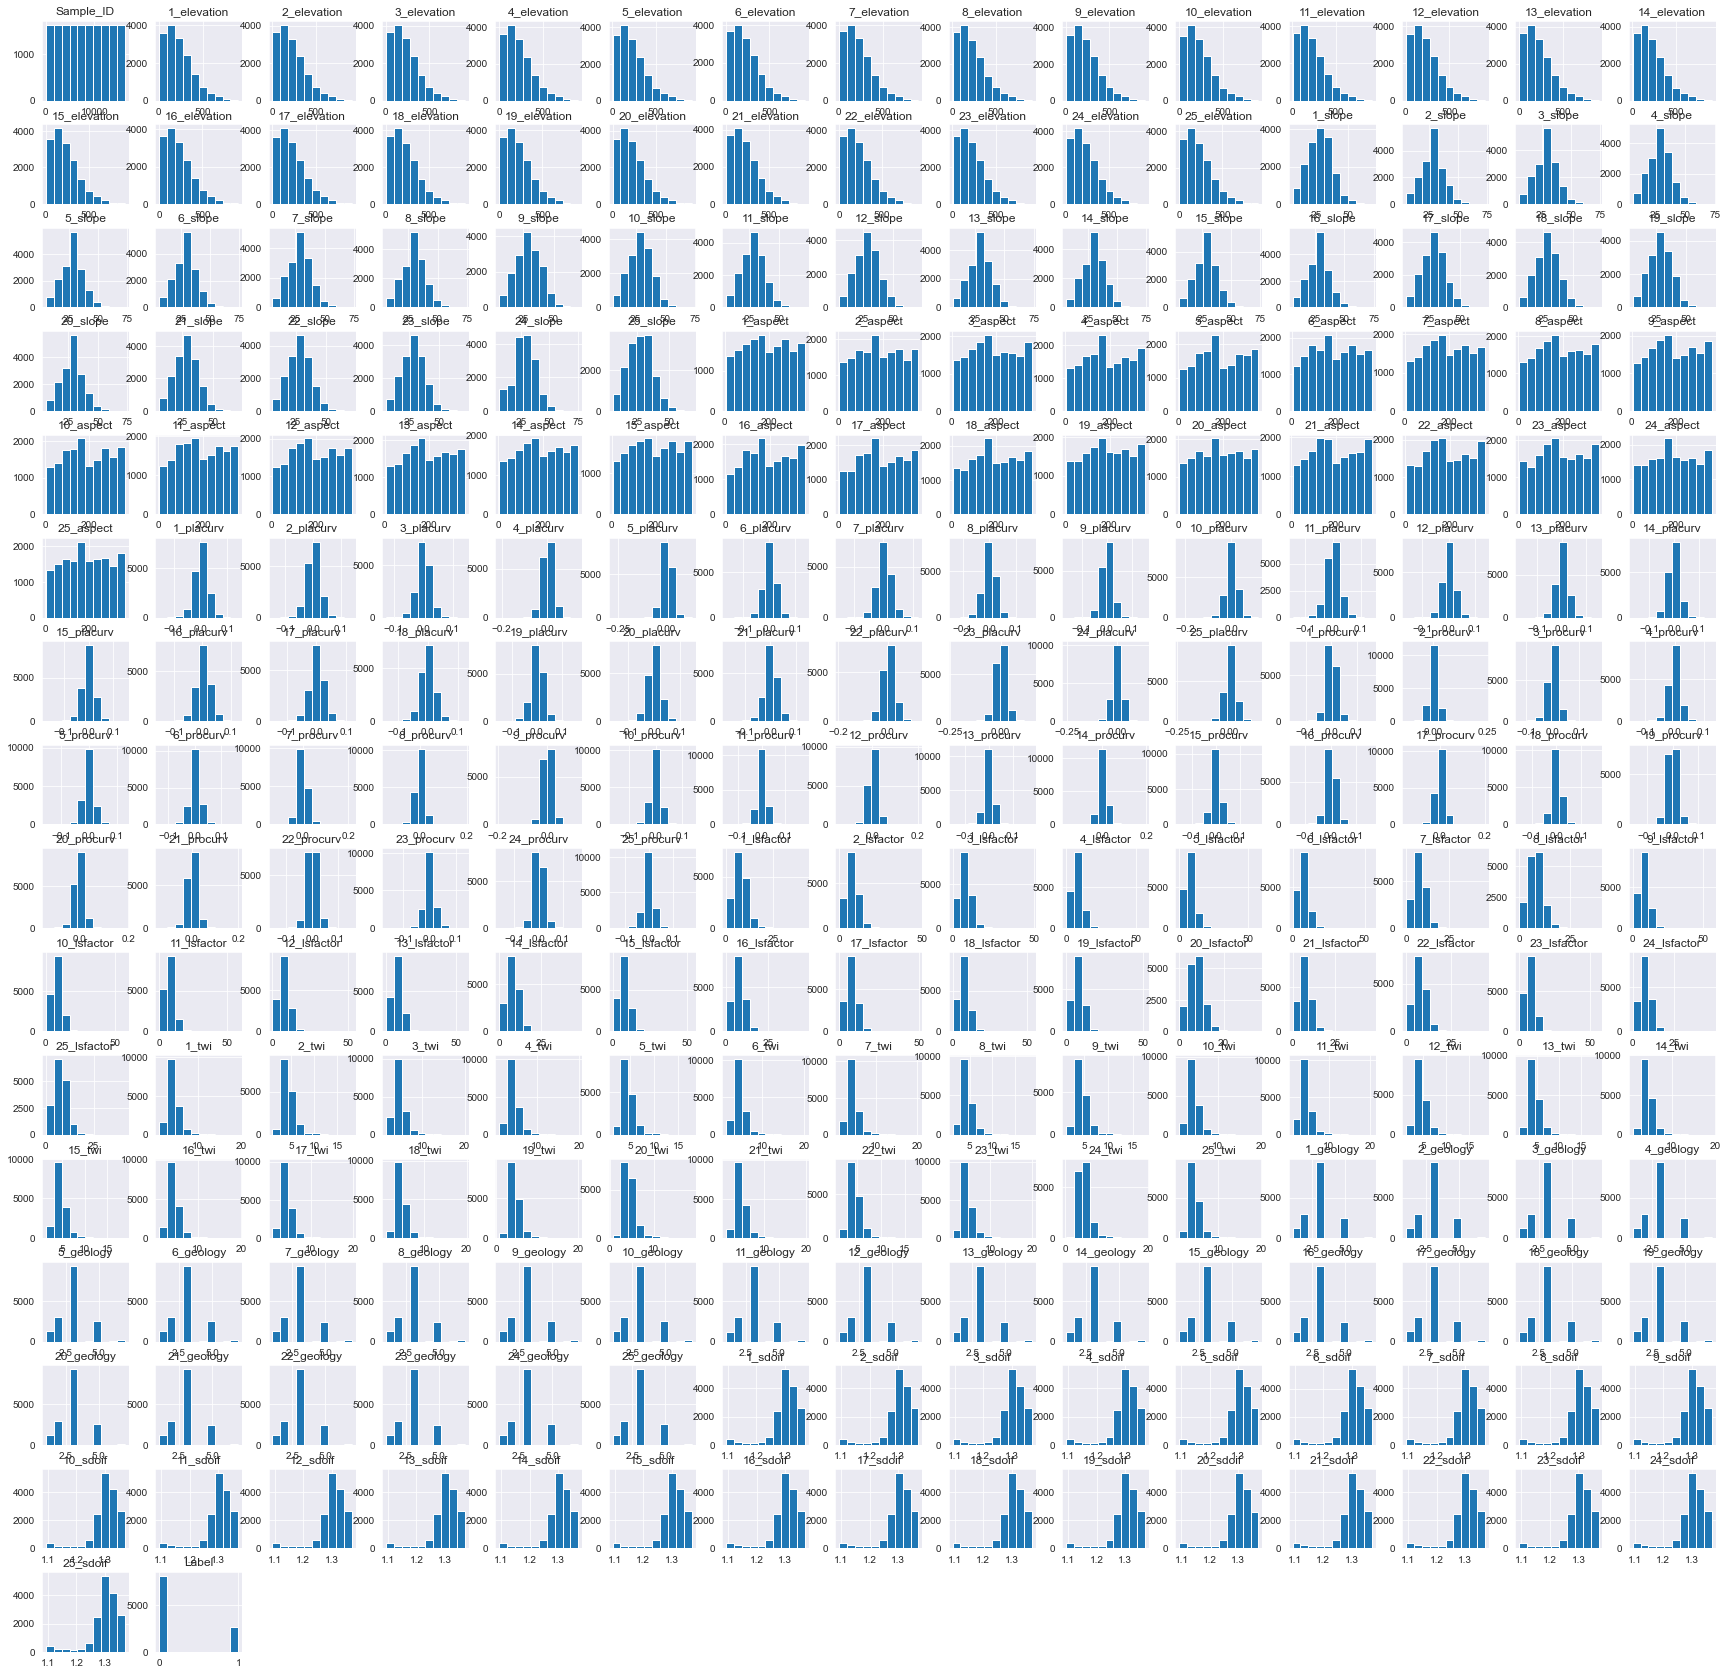

Wall time: 1min 7s


In [31]:
%%time

df_num.hist(figsize = (30, 30))
plt.show()

### 6. Feature Selection

<a name = "Outliers"></a>
### 6. Outliers

In [32]:
# Exploring some features for cell 1
explore_cols =  ['1_elevation', '1_aspect', '1_slope', '1_placurv', '1_procurv', '1_lsfactor', '1_twi', '1_geology',
                '1_sdoif']
explore_cols

['1_elevation',
 '1_aspect',
 '1_slope',
 '1_placurv',
 '1_procurv',
 '1_lsfactor',
 '1_twi',
 '1_geology',
 '1_sdoif']

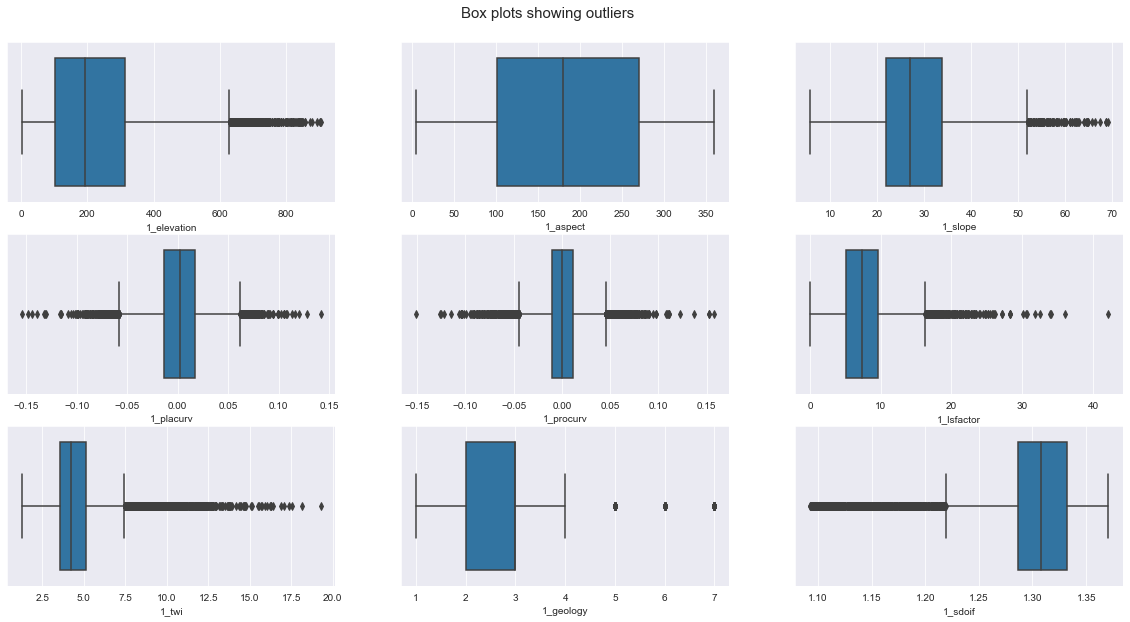

In [33]:
# plotting boxplots for each of the numerical columns
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10))
fig.suptitle('Box plots showing outliers', y=0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), alldata, explore_cols):
    sns.boxplot(alldata[name], ax = ax)

 Elevation, slope, Placurv, procurve, IsFactor, twi, geology and sdoif have some outliers.
 The aspect feature has no outliers.
 
 Some of the techniques you can use to handle outliers include:
  1. Log transformations, scaling, box-cox transformations...
  2. Dropping the outliers
  3. Replacing the outliers with mean, median, mode or any other aggregates

In [34]:
# function to create histogram, Q-Q plot and boxplot.

def diagnostic_plots(df, variable):
    # function that takes a dataframe and the variable of interest as arguments
    # define figure size
    plt.figure(figsize=(16, 4))
    
    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')
    
    # Q-Q Plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist='norm', plot=plt)
    plt.ylabel('Variable Quantiles')
    
    # boxplots
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title("Boxplot")
    
    plt.show()

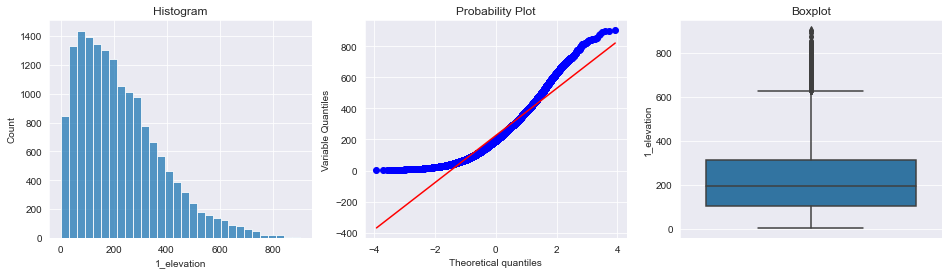

In [35]:
# let's find outliers in elevation

diagnostic_plots(alldata, '1_elevation')

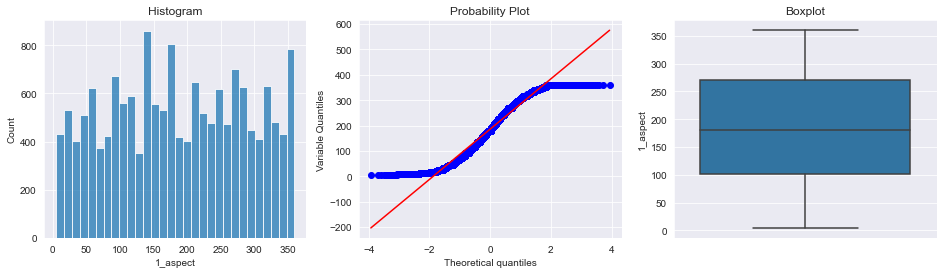

In [36]:
# let's find outliers in aspect

diagnostic_plots(alldata, '1_aspect')

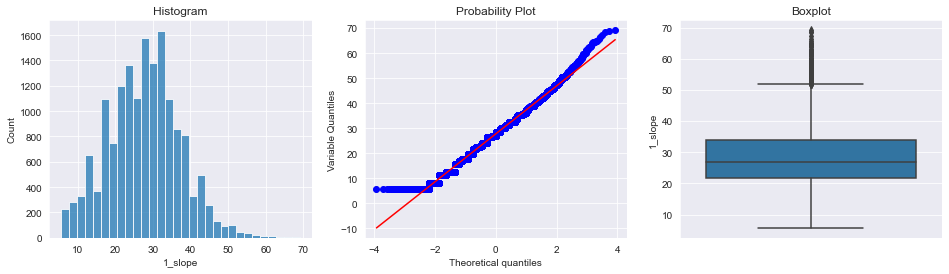

In [37]:
# let's find outliers in slope

diagnostic_plots(alldata, '1_slope')

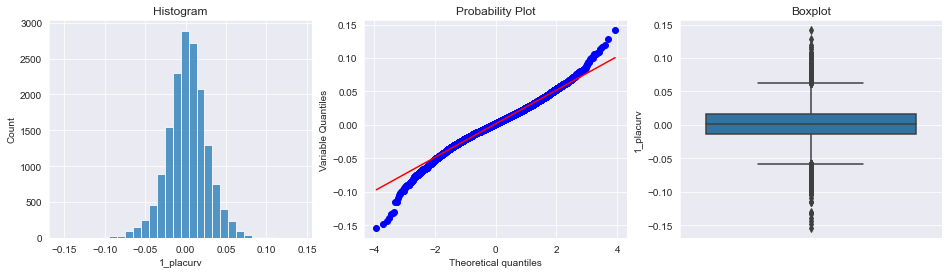

In [38]:
# let's find outliers in placurv

diagnostic_plots(alldata, '1_placurv')

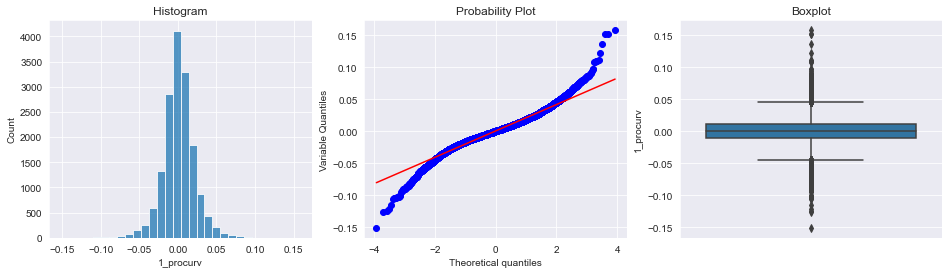

In [39]:
# let's find outliers in procurv

diagnostic_plots(alldata, '1_procurv')

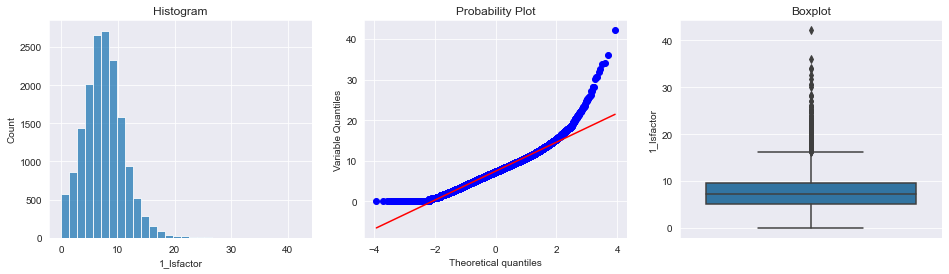

In [40]:
# let's find outliers in Isfactor

diagnostic_plots(alldata, '1_lsfactor')

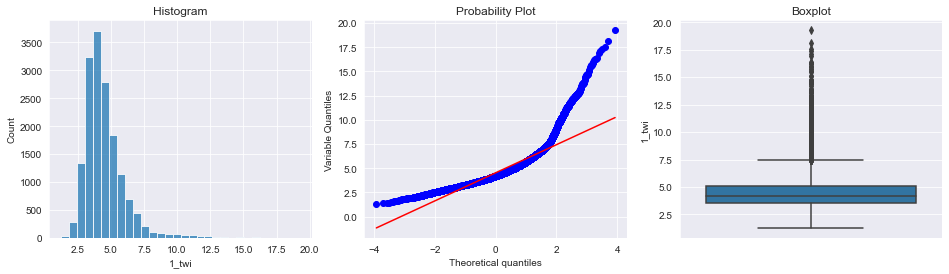

In [41]:
# let's find outliers in twi

diagnostic_plots(alldata, '1_twi')

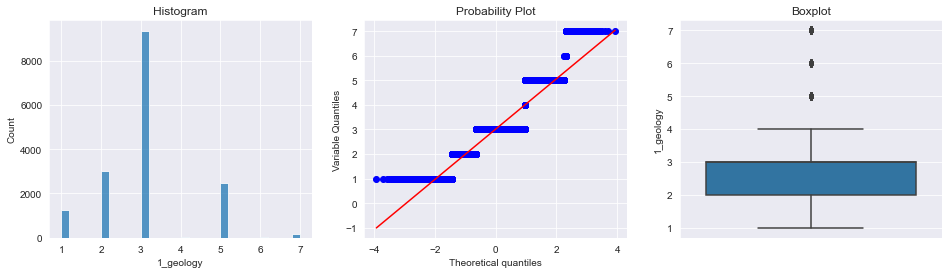

In [42]:
# let's find outliers in geology

diagnostic_plots(alldata, '1_geology')

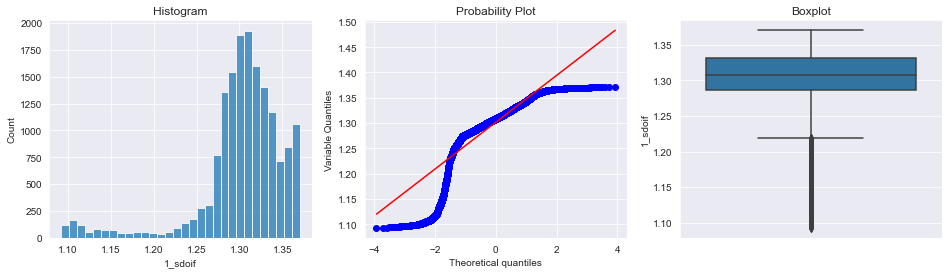

In [43]:
# let's find outliers in sdoif

diagnostic_plots(alldata, '1_sdoif')

When doing capping, we tend to cap values both in train and test set. It is important to remember that the capping values MUST be derived from the train set. And then use those same values to cap the variables in the test set.

To find the outliers, let's define a function that will trim off the outliers:

In [44]:
def find_skewed_boundaries(df, variable, distance):
    
    # Let's calculate the boundaries outside which sit the outliers for skewed distributions

    # distance passed as an argument, gives us the option to estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    
    return upper_boundary, lower_boundary

In [45]:
# find limits for 1_elevation

el_upper_limit, el_lower_limit = find_skewed_boundaries(alldata, '1_elevation', 1.5)
el_upper_limit, el_lower_limit

(628.0, -212.0)

In [46]:
# find limits for 1_aspect

asp_upper_limit, asp_lower_limit = find_skewed_boundaries(alldata, '1_aspect', 1.5)
asp_upper_limit, asp_lower_limit

(523.0351499999999, -151.72525)

In [47]:
# find limits for 1_slope

slope_upper_limit, slope_lower_limit = find_skewed_boundaries(alldata, '1_slope', 1.5)
slope_upper_limit, slope_lower_limit

(51.934185, 3.721745000000002)

In [48]:
# find limits for 1_placurv

placurv_upper_limit, placurv_lower_limit = find_skewed_boundaries(alldata, '1_placurv', 1.5)
placurv_upper_limit, placurv_lower_limit

(0.06216185125, -0.05808587875)

In [49]:
# find limits for 1_procurv

procurv_upper_limit, procurv_lower_limit = find_skewed_boundaries(alldata, '1_procurv', 1.5)
procurv_upper_limit, procurv_lower_limit

(0.0453952775, -0.0441799625)

In [50]:
# find limits for 1_isfactor

isfactor_upper_limit, isfactor_lower_limit = find_skewed_boundaries(alldata, '1_lsfactor', 1.5)
isfactor_upper_limit, isfactor_lower_limit

(16.2791395, -1.6186344999999989)

In [51]:
# find limits for 1_twi

twi_upper_limit, twi_lower_limit = find_skewed_boundaries(alldata, '1_twi', 1.5)
twi_upper_limit, twi_lower_limit

(7.4441936250000005, 1.2000786249999997)

In [52]:
# find limits for 1_geology

geology_upper_limit, geology_lower_limit = find_skewed_boundaries(alldata, '1_geology', 1.5)
geology_upper_limit, geology_lower_limit

(4.5, 0.5)

In [53]:
# find limits for 1_sdoif

sdoif_upper_limit, sdoif_lower_limit = find_skewed_boundaries(alldata, '1_sdoif', 1.5)
sdoif_upper_limit, sdoif_lower_limit

(1.3994662499999997, 1.2191562500000002)

In [54]:
# Now let's replace the outliers by the max and min limit
alldata['1_elevation'] = np.where(alldata['1_elevation'] > el_upper_limit, el_upper_limit,
                         np.where(alldata['1_elevation'] < el_lower_limit, el_lower_limit, alldata['1_elevation']))

In [55]:
# Now let's replace the outliers by the max and min limit
alldata['1_aspect'] = np.where(alldata['1_aspect'] > asp_upper_limit, asp_upper_limit,
                         np.where(alldata['1_aspect'] < asp_lower_limit, asp_lower_limit, alldata['1_aspect']))

In [56]:
# Now let's replace the outliers by the max and min limit
alldata['1_slope'] = np.where(alldata['1_slope'] > slope_upper_limit, slope_upper_limit,
                         np.where(alldata['1_slope'] < slope_lower_limit, slope_lower_limit, alldata['1_slope']))

In [57]:
# Now let's replace the outliers by the max and min limit
alldata['1_placurv'] = np.where(alldata['1_placurv'] > placurv_upper_limit, placurv_upper_limit,
                         np.where(alldata['1_placurv'] < placurv_lower_limit, placurv_lower_limit, alldata['1_placurv']))

In [58]:
# Now let's replace the outliers by the max and min limit
alldata['1_procurv'] = np.where(alldata['1_procurv'] > procurv_upper_limit, procurv_upper_limit,
                         np.where(alldata['1_procurv'] < procurv_lower_limit, procurv_lower_limit, alldata['1_procurv']))

In [59]:
# Now let's replace the outliers by the max and min limit
alldata['1_lsfactor'] = np.where(alldata['1_lsfactor'] > isfactor_upper_limit, isfactor_upper_limit,
                         np.where(alldata['1_lsfactor'] < isfactor_lower_limit, isfactor_lower_limit, alldata['1_lsfactor']))

In [60]:
# Now let's replace the outliers by the max and min limit
alldata['1_twi'] = np.where(alldata['1_twi'] > twi_upper_limit, twi_upper_limit,
                         np.where(alldata['1_twi'] < twi_lower_limit, twi_lower_limit, alldata['1_twi']))

In [61]:
# Now let's replace the outliers by the max and min limit
alldata['1_geology'] = np.where(alldata['1_geology'] > geology_upper_limit, geology_upper_limit,
                         np.where(alldata['1_geology'] < geology_lower_limit, geology_lower_limit, alldata['1_geology']))

In [62]:
# Now let's replace the outliers by the max and min limit
alldata['1_sdoif'] = np.where(alldata['1_sdoif'] > sdoif_upper_limit, sdoif_upper_limit,
                         np.where(alldata['1_sdoif'] < sdoif_lower_limit, sdoif_lower_limit, alldata['1_sdoif']))

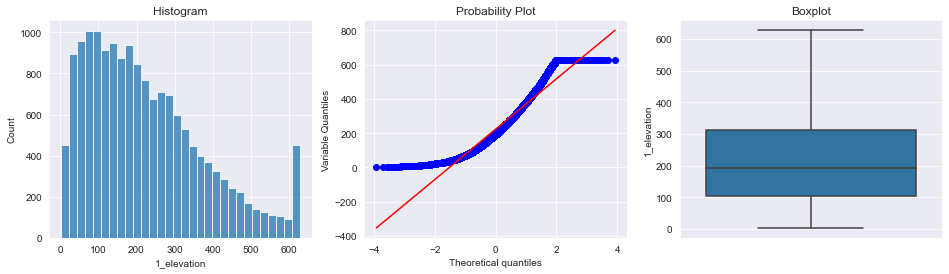

In [63]:
# let's explore outliers in the trimmed dataset
# for 1_elevation we see much less outliers as in the original dataset

diagnostic_plots(alldata, '1_elevation')

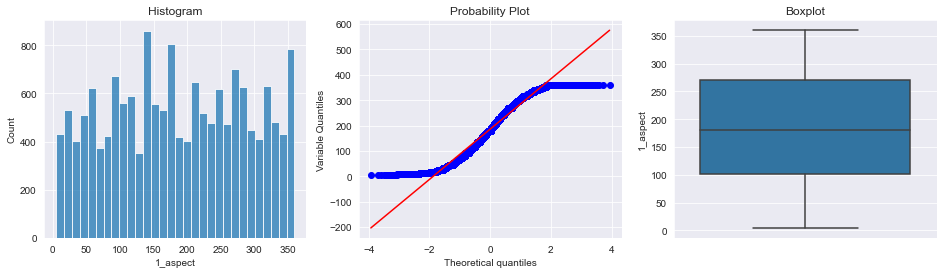

In [64]:
# let's explore outliers in the trimmed dataset
# for 1_aspect we see much less outliers as in the original dataset

diagnostic_plots(alldata, '1_aspect')

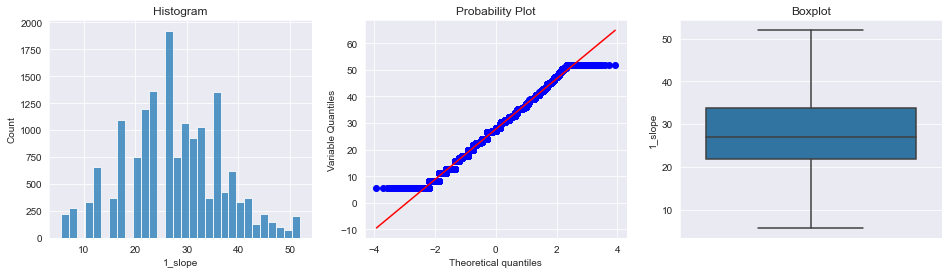

In [65]:
# let's explore outliers in the trimmed dataset
# for 1_slope we see much less outliers as in the original dataset

diagnostic_plots(alldata, '1_slope')

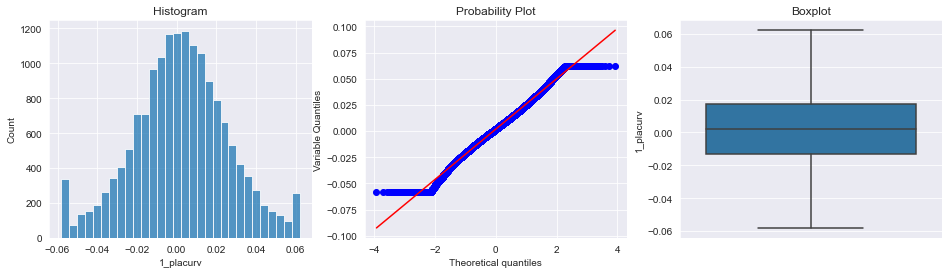

In [66]:
# let's explore outliers in the trimmed dataset
# for 1_placurv we see much less outliers as in the original dataset

diagnostic_plots(alldata, '1_placurv')

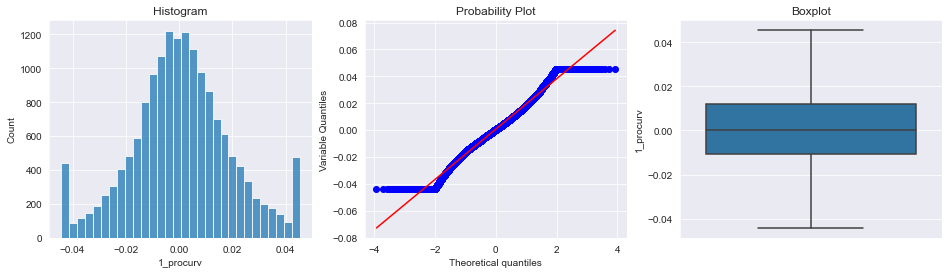

In [67]:
# let's explore outliers in the trimmed dataset
# for 1_procurv we see much less outliers as in the original dataset

diagnostic_plots(alldata, '1_procurv')

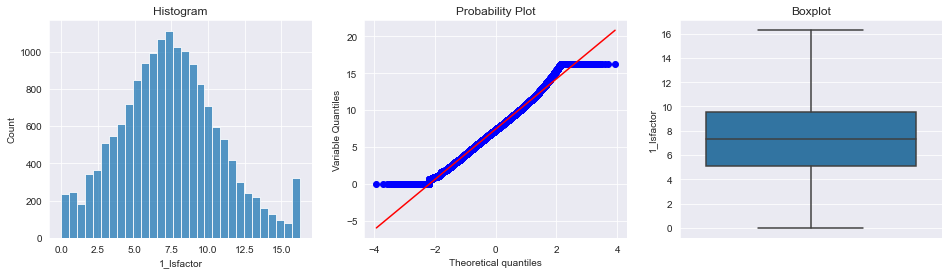

In [68]:
# let's explore outliers in the trimmed dataset
# for 1_lsfactor we see much less outliers as in the original dataset

diagnostic_plots(alldata, '1_lsfactor')

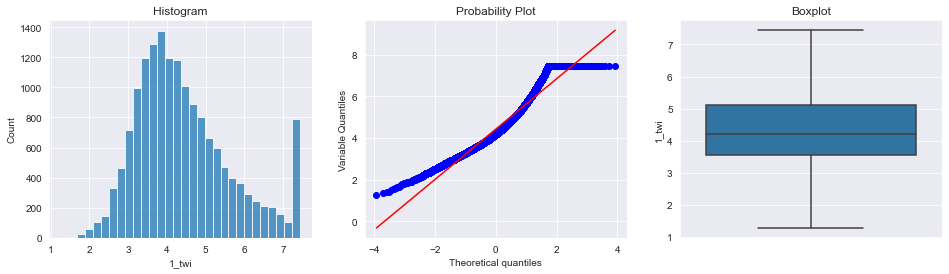

In [69]:
# let's explore outliers in the trimmed dataset
# for 1_twi we see much less outliers as in the original dataset

diagnostic_plots(alldata, '1_twi')

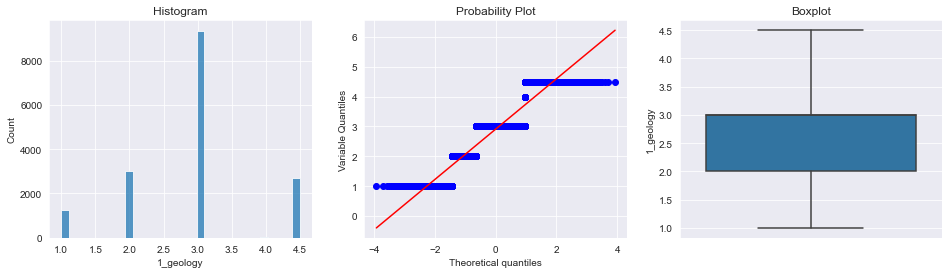

In [70]:
# let's explore outliers in the trimmed dataset
# for 1_geology we see much less outliers as in the original dataset

diagnostic_plots(alldata, '1_geology')

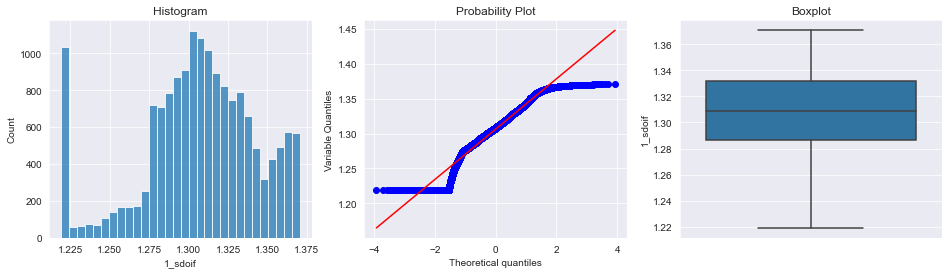

In [71]:
# let's explore outliers in the trimmed dataset
# for 1_sdoif we see much less outliers as in the original dataset

diagnostic_plots(alldata, '1_sdoif')

We can see that the outliers are gone, but the variable distribution was distorted quite a bit.

In [72]:
alldata.describe()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif,Label
count,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,1.629400e+04,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,1.629400e+04,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,16294.000000,1629

In [73]:
# separate the data into train and test set
train = alldata[alldata['source'] == 'train']

test = alldata[alldata['source'] == 'test']

# # drop the source and id columns
train = train.drop(['source'], axis = 1)

test = test.drop(['source'], axis = 1)

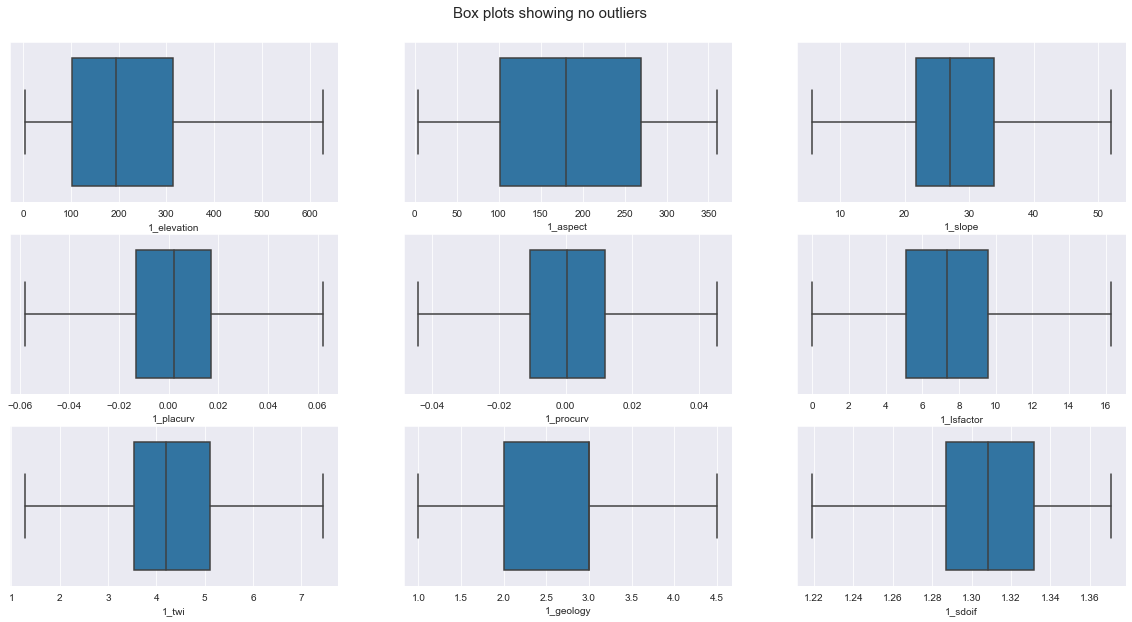

In [74]:
# plotting boxplots for each of the numerical columns
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (20, 10))
fig.suptitle('Box plots showing no outliers', y=0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), alldata, explore_cols):
    sns.boxplot(alldata[name], ax = ax)

<a name = "Correlations"></a>
### 8. Correlations
​
Now we'll try to find which features are strongly correlated with the target column `target`. We'll store them in a var called golden_features_list. We'll reuse our df_num dataset to do so.

<Figure size 1440x864 with 0 Axes>

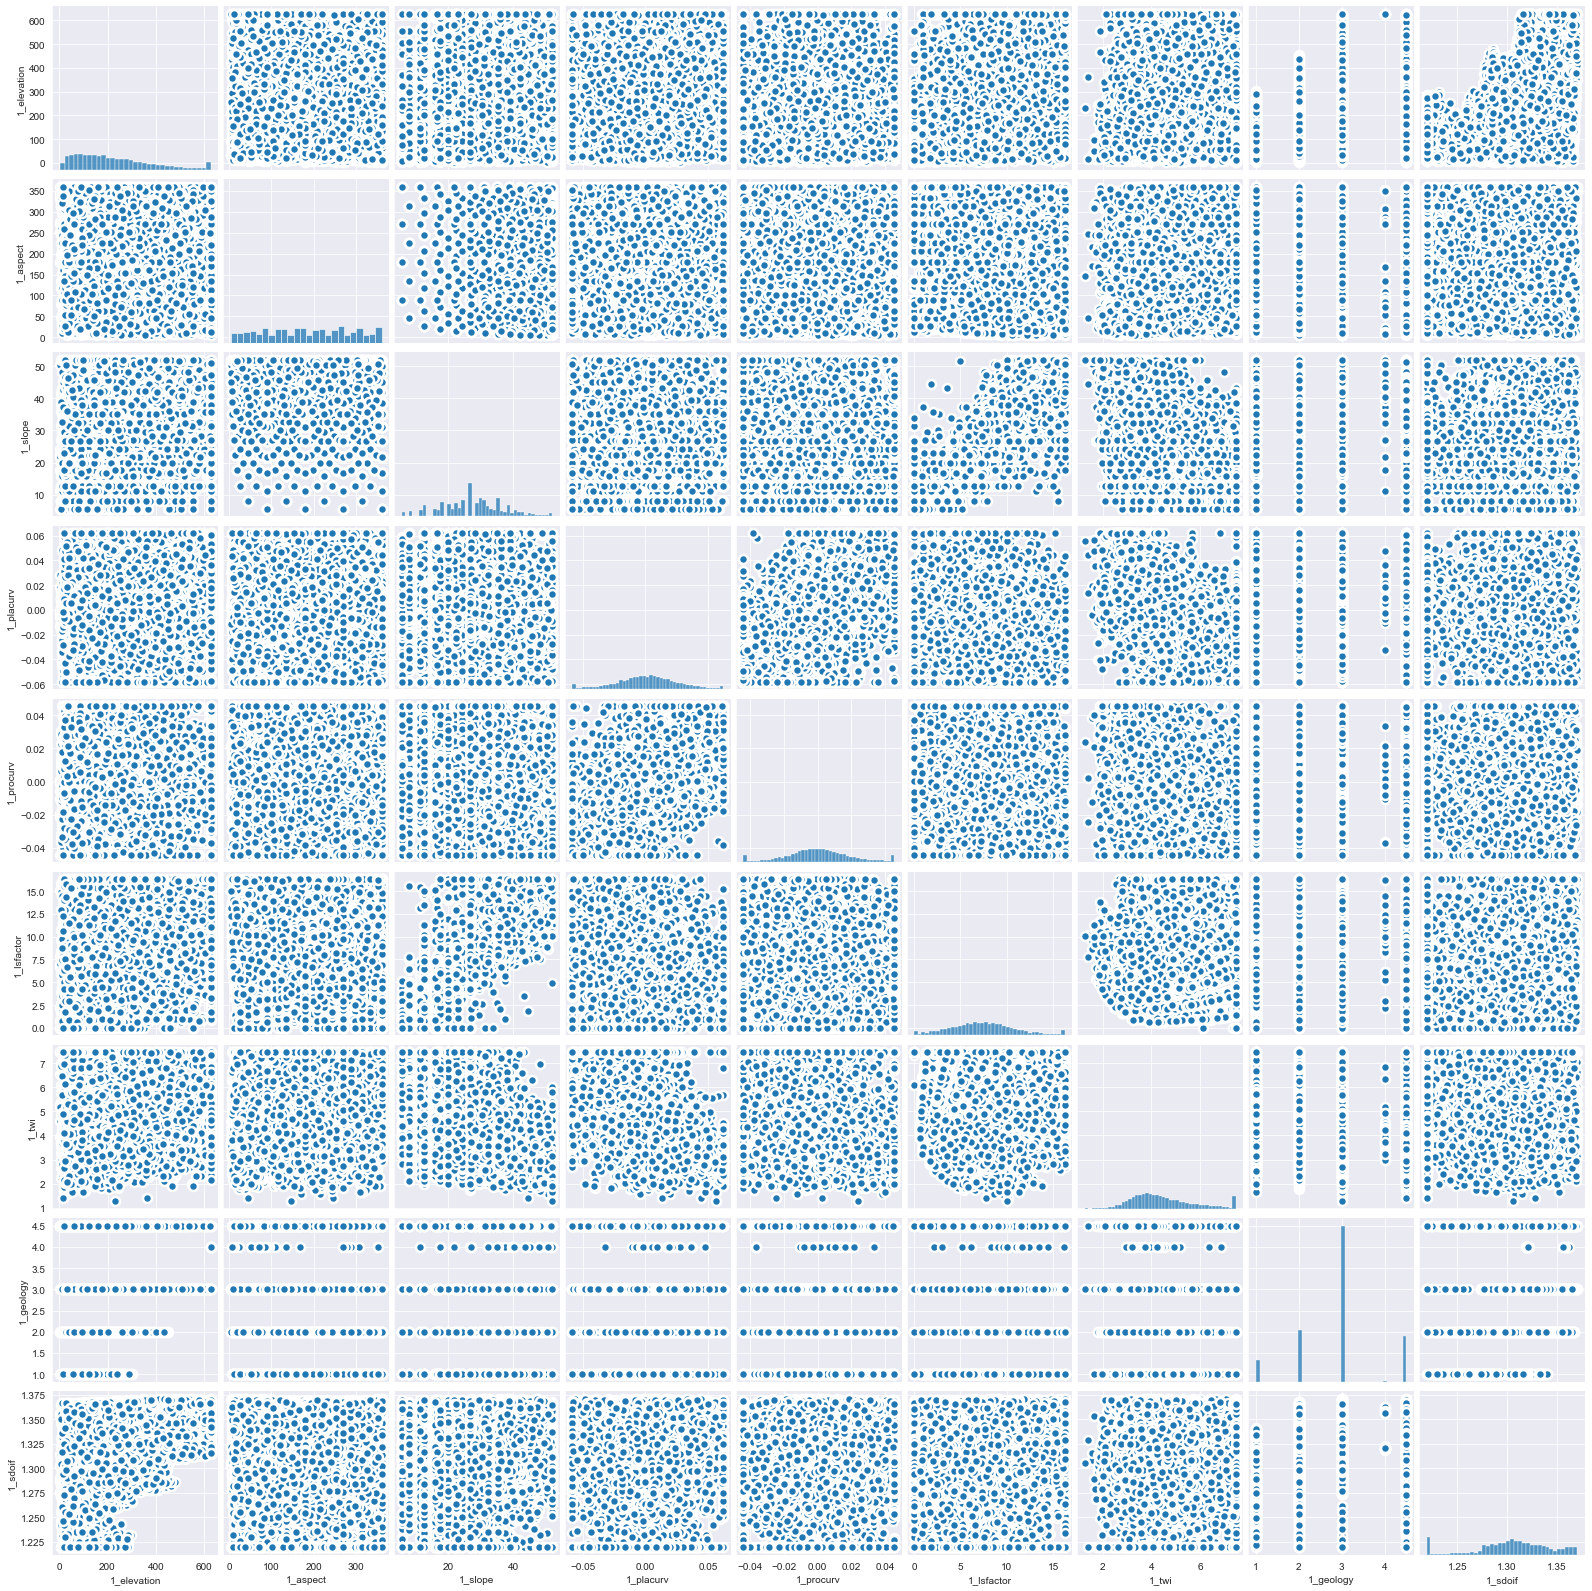

In [75]:
# Type of correlations 
plt.figure(figsize = (20, 12))
sns.pairplot(train[explore_cols], kind="scatter", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [76]:
df_num_corr = df_num.corr()['Label'][:-1] # -1 because the last row is the target column
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There are {} strongly correlated numerical values with target column 'Label':\n{}".format(len(golden_features_list), golden_features_list))

There are 0 strongly correlated numerical values with target column 'Label':
Series([], Name: Label, dtype: float64)


In [77]:
import operator

individual_features_df = []

for i in range(0, len(df_num.columns) - 1):
    tmpDF = df_num[[df_num.columns[i], 'Label']]
    tmpDF = tmpDF[tmpDF[df_num.columns[i]] != 0]
    individual_features_df.append(tmpDF)
    
all_correlations = {feature.columns[0]: feature.corr()['Label'][0] for feature in individual_features_df}
all_correlations = sorted(all_correlations.items(), key=operator.itemgetter(1))
for (key, value) in all_correlations:
    print("{:>15}: {:>15}".format(key, value))

          8_twi: -0.19055220834865552
         13_twi: -0.18894202492591272
          7_twi: -0.17530930180087131
          9_twi: -0.17301414578677543
         12_twi: -0.17253282332984005
          3_twi: -0.17108685744310193
         14_twi: -0.1660853614806561
         11_twi: -0.1656619449378542
          2_twi: -0.1631890089863593
         18_twi: -0.15902181451446007
         17_twi: -0.15780227338898356
          6_twi: -0.15737384832208295
          4_twi: -0.15591479279382028
         19_twi: -0.15217846076545408
         16_twi: -0.15136221411857761
         23_twi: -0.1457805668179951
          1_twi: -0.14531736129532813
         21_twi: -0.14152447455308914
         22_twi: -0.13675690416656192
         15_twi: -0.13670680164315
         10_twi: -0.13626749509132374
          5_twi: -0.13386256115084066
         20_twi: -0.1258639319004363
         24_twi: -0.12400433527790096
         25_twi: -0.11157020740302108
     15_placurv: -0.08006240566600376
     10_placurv: -0.

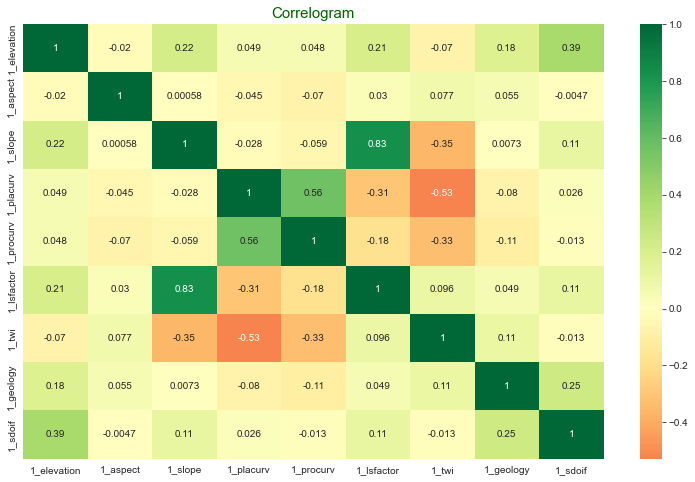

In [78]:
### Quantify correlations
corr = train[explore_cols].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

 - There is a strong positive correlation of approximately 0.8 between slope and IsFactor
 - There is some negative correlation between IsFactor and placurv
 - There is also some negative correlation between twi and placurv

In [79]:
# drop the empty Label column
test = test.drop(['Label'], axis=1)
test.head()

,Sample_ID,1_elevation,2_elevation,3_elevation,4_elevation,5_elevation,6_elevation,7_elevation,8_elevation,9_elevation,10_elevation,11_elevation,12_elevation,13_elevation,14_elevation,15_elevation,16_elevation,17_elevation,18_elevation,19_elevation,20_elevation,21_elevation,22_elevation,23_elevation,24_elevation,25_elevation,1_slope,2_slope,3_slope,4_slope,5_slope,6_slope,7_slope,8_slope,9_slope,10_slope,11_slope,12_slope,13_slope,14_slope,15_slope,16_slope,17_slope,18_slope,19_slope,20_slope,21_slope,22_slope,23_slope,24_slope,25_slope,1_aspect,2_aspect,3_aspect,4_aspect,5_aspect,6_aspect,7_aspect,8_aspect,9_aspect,10_aspect,11_aspect,12_aspect,13_aspect,14_aspect,15_aspect,16_aspect,17_aspect,18_aspect,19_aspect,20_aspect,21_aspect,22_aspect,23_aspect,24_aspect,25_aspect,1_placurv,2_placurv,3_placurv,4_placurv,5_placurv,6_placurv,7_placurv,8_placurv,9_placurv,10_placurv,11_placurv,12_placurv,13_placurv,14_placurv,15_placurv,16_placurv,17_placurv,18_placurv,19_placurv,20_placurv,21_placurv,22_placurv,23_placurv,24_placurv,25_placurv,1_procurv,2_procurv,3_procurv,4_procurv,5_procurv,6_procurv,7_procurv,8_procurv,9_procurv,10_procurv,11_procurv,12_procurv,13_procurv,14_procurv,15_procurv,16_procurv,17_procurv,18_procurv,19_procurv,20_procurv,21_procurv,22_procurv,23_procurv,24_procurv,25_procurv,1_lsfactor,2_lsfactor,3_lsfactor,4_lsfactor,5_lsfactor,6_lsfactor,7_lsfactor,8_lsfactor,9_lsfactor,10_lsfactor,11_lsfactor,12_lsfactor,13_lsfactor,14_lsfactor,15_lsfactor,16_lsfactor,17_lsfactor,18_lsfactor,19_lsfactor,20_lsfactor,21_lsfactor,22_lsfactor,23_lsfactor,24_lsfactor,25_lsfactor,1_twi,2_twi,3_twi,4_twi,5_twi,6_twi,7_twi,8_twi,9_twi,10_twi,11_twi,12_twi,13_twi,14_twi,15_twi,16_twi,17_twi,18_twi,19_twi,20_twi,21_twi,22_twi,23_twi,24_twi,25_twi,1_geology,2_geology,3_geology,4_geology,5_geology,6_geology,7_geology,8_geology,9_geology,10_geology,11_geology,12_geology,13_geology,14_geology,15_geology,16_geology,17_geology,18_geology,19_geology,20_geology,21_geology,22_geology,23_geology,24_geology,25_geology,1_sdoif,2_sdoif,3_sdoif,4_sdoif,5_sdoif,6_sdoif,7_sdoif,8_sdoif,9_sdoif,10_sdoif,11_sdoif,12_sdoif,13_sdoif,14_sdoif,15_sdoif,16_sdoif,17_sdoif,18_sdoif,19_sdoif,20_sdoif,21_sdoif,22_sdoif,23_sdoif,24_sdoif,25_sdoif
10864,10865,111.0,109,109,110,112,117,114,113,112,113,120,120,118,116,115,122,122,122,121,120,122,122,121,121,123,45.83452,36.055030,27.01712,22.98977,27.01712,43.49152,49.490830,42.67464,30.96376,22.98977,27.017120,39.509710,44.56372,43.49152,35.26439,12.604380,11.309930,17.54840,28.30320,38.87666,5.710593,5.710593,8.049467,12.60438,26.56505,240.9454,254.05460,281.30990,315.00000,348.69010,251.56500,250.01690,257.47120,270.00000,315.00000,281.30990,255.96380,246.03750,251.56500,278.130100,296.56510,270.00000,251.56500,248.19860,277.125000,360.00000,180.00000,135.00000,333.43490,306.86990,0.035766,-0.013152,-0.037572,-0.062401,-0.055791,0.027593,0.002834,-0.038738,-0.052596,-0.035428,0.031410,0.010285,-0.030370,-0.047145,-0.030835,0.060269,0.010774,-0.009391,-0.030129,-0.029237,0.088753,0.075792,0.023841,-0.001485,-0.010110,-0.016483,-0.044767,-0.042420,-0.053476,-0.043530,0.008279,0.002710,-0.010917,-0.013603,-0.011500,0.026537,0.017282,-0.005495,-0.016250,-0.016121,0.074879,0.055460,0.042507,0.019065,-0.003870,0.024342,0.042834,0.056148,0.040106,0.021167,9.667106,8.181493,7.782584,8.776177,10.954420,8.896092,11.257830,10.227420,10.278770,8.030625,5.094675,8.138618,10.002860,11.459460,9.746919,1.718303,1.830190,4.348740,5.784863,10.840700,0.664827,0.000081,0.000261,0.846584,4.815838,2.682646,4.814003,6.252043,6.667844,6.602260,2.240095,2.561107,3.066897,5.311826,6.215635,2.774525,2.446323,2.663095,3.096692,4.132727,2.930157,4.044015,3.533233,2.135064,4.028785,4.076646,8.517193,9.857834,5.307338,3.319677,2.0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1.310570,1.310638,1.310684,1.310752,1.310797,1.310388,1.310456,1.310502,1.310570,1.310616,1.310266,1.310335,1.310381,1.310449,1.310495,1.310084,1.310153,1.310199,1

In [80]:
# Split the data into X(features) and y(target)
main_cols = train.columns.difference(['Sample_ID', 'Label'])
X = train[main_cols]
y = train['Label']

In [81]:
X.shape, y.shape

((10864, 225), (10864,))

In [82]:
y.value_counts()

0.0    8148
1.0    2716
Name: Label, dtype: int64

In [83]:
# Let's separate the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape, X_test.shape

((8691, 225), (2173, 225))

<a name = "Model"></a>
## 9. Model training

#### LightGBM

In [84]:
%%time

# LightGBM
model = LGBMClassifier(scale_pos_weight= 3,
                       learning_rate = 0.1,
                       importance_type = 'gain',
                       num_leaves = 30,
                       n_jobs= -1,
                       random_state = 42)

# set up parameter search grid including class weight
param_grid = dict(max_depth = [None, 4, 8])

# Repeated k-fold cross-validation
rkf = RepeatedKFold(n_splits = 5,
                    n_repeats = 10,
                    random_state = 42)

# Fitting grid search to the train data with 5 folds
clf = GridSearchCV(model,
                  param_grid,
                  scoring = "f1",
                  cv = rkf,
                  refit = True # refits best model to the entire dataset
                  )

model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the f1 score of the model
print(f'LGBM F1 score on the X_test is: {f1_score(y_test, y_pred)}\n')

LGBM F1 score on the X_test is: 0.7269681742043552

Wall time: 27 s


In [85]:
# Evaluate the lgbm model f1 score metric
model.score(X_test, y_test)

0.8499769903359411

In [86]:
# let's get the predictions
y_pred = model.predict(X_train)
y_pred_test = model.predict(X_test)

print('LGBM train f1 score: ', f1_score(y_train, y_pred))
print('LGBM test f1 score: ', f1_score(y_test, y_pred_test))

LGBM train f1 score:  0.9200171086398632
LGBM test f1 score:  0.7269681742043552


In [87]:
y_pred_proba = model.predict_proba(X_test)[:,1]
y_pred_proba[:10]

array([0.76788226, 0.02934194, 0.0383433 , 0.12384064, 0.04303546,
       0.90169933, 0.04163601, 0.00971485, 0.01559273, 0.02839053])

In [88]:
y_pred_test[:10]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [89]:
np.array(y_test)[:10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [90]:
print('Precision Score: ', round(precision_score(y_test, y_pred_test), 5))
print('Recall Score: ', round(recall_score(y_test, y_pred_test), 5))
print('F1 Score: ', round(f1_score(y_test, y_pred_test), 5))
print('Accuracy Score: ', round(accuracy_score(y_test, y_pred_test), 5))
print('ROC AUC: ', round(roc_auc_score(y_test, y_pred_test), 5))

Precision Score:  0.68025
Recall Score:  0.78058
F1 Score:  0.72697
Accuracy Score:  0.84998
ROC AUC:  0.82721


In [91]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90      1617
         1.0       0.68      0.78      0.73       556

    accuracy                           0.85      2173
   macro avg       0.80      0.83      0.81      2173
weighted avg       0.86      0.85      0.85      2173



[[1413  204]
 [ 122  434]]


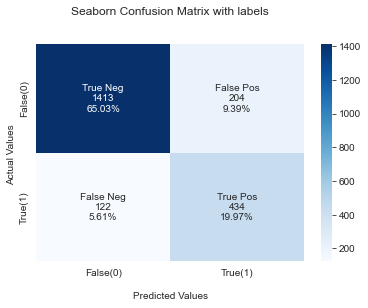

In [92]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False(0)','True(1)'])
ax.yaxis.set_ticklabels(['False(0)','True(1)'])

## Display the visualization of the Confusion Matrix.
plt.show()

### CatBoost Classifier

In [93]:
%%time

# CatBoost Classifier
cb_model = CatBoostClassifier(scale_pos_weight= 3,
                              early_stopping_rounds = 3,
                              random_state = 42)

cb_model.fit(X_train, y_train)

# Make predictions
cb_pred = cb_model.predict(X_test)

# Check the f1 score of the model
print(f'CatBoost F1 score on the X_test is: {f1_score(y_test, cb_pred)}\n')

Learning rate set to 0.025937
0:	learn: 0.6823121	total: 302ms	remaining: 5m 1s
1:	learn: 0.6720007	total: 417ms	remaining: 3m 27s
2:	learn: 0.6620429	total: 526ms	remaining: 2m 54s
3:	learn: 0.6535772	total: 636ms	remaining: 2m 38s
4:	learn: 0.6452556	total: 766ms	remaining: 2m 32s
5:	learn: 0.6367047	total: 906ms	remaining: 2m 30s
6:	learn: 0.6293509	total: 1.02s	remaining: 2m 24s
7:	learn: 0.6220510	total: 1.13s	remaining: 2m 20s
8:	learn: 0.6153526	total: 1.24s	remaining: 2m 16s
9:	learn: 0.6092530	total: 1.35s	remaining: 2m 13s
10:	learn: 0.6031216	total: 1.46s	remaining: 2m 11s
11:	learn: 0.5974815	total: 1.57s	remaining: 2m 9s
12:	learn: 0.5914385	total: 1.68s	remaining: 2m 7s
13:	learn: 0.5854098	total: 1.79s	remaining: 2m 6s
14:	learn: 0.5801966	total: 1.9s	remaining: 2m 4s
15:	learn: 0.5750340	total: 2.01s	remaining: 2m 3s
16:	learn: 0.5703642	total: 2.11s	remaining: 2m 2s
17:	learn: 0.5655646	total: 2.23s	remaining: 2m 1s
18:	learn: 0.5615371	total: 2.34s	remaining: 2m
19:	l

160:	learn: 0.4011360	total: 16.4s	remaining: 1m 25s
161:	learn: 0.4006646	total: 16.5s	remaining: 1m 25s
162:	learn: 0.4001604	total: 16.6s	remaining: 1m 25s
163:	learn: 0.3996237	total: 16.7s	remaining: 1m 25s
164:	learn: 0.3990974	total: 16.8s	remaining: 1m 25s
165:	learn: 0.3986439	total: 16.9s	remaining: 1m 24s
166:	learn: 0.3983086	total: 17s	remaining: 1m 24s
167:	learn: 0.3979695	total: 17.1s	remaining: 1m 24s
168:	learn: 0.3974816	total: 17.3s	remaining: 1m 24s
169:	learn: 0.3971026	total: 17.4s	remaining: 1m 24s
170:	learn: 0.3965627	total: 17.5s	remaining: 1m 24s
171:	learn: 0.3961740	total: 17.6s	remaining: 1m 24s
172:	learn: 0.3956564	total: 17.7s	remaining: 1m 24s
173:	learn: 0.3952268	total: 17.8s	remaining: 1m 24s
174:	learn: 0.3946930	total: 17.9s	remaining: 1m 24s
175:	learn: 0.3943108	total: 18s	remaining: 1m 24s
176:	learn: 0.3939358	total: 18.1s	remaining: 1m 24s
177:	learn: 0.3935933	total: 18.3s	remaining: 1m 24s
178:	learn: 0.3932309	total: 18.4s	remaining: 1m 2

318:	learn: 0.3438008	total: 34.2s	remaining: 1m 12s
319:	learn: 0.3434855	total: 34.3s	remaining: 1m 12s
320:	learn: 0.3431626	total: 34.4s	remaining: 1m 12s
321:	learn: 0.3428313	total: 34.5s	remaining: 1m 12s
322:	learn: 0.3424940	total: 34.6s	remaining: 1m 12s
323:	learn: 0.3422543	total: 34.8s	remaining: 1m 12s
324:	learn: 0.3419993	total: 34.9s	remaining: 1m 12s
325:	learn: 0.3416867	total: 35.1s	remaining: 1m 12s
326:	learn: 0.3414118	total: 35.2s	remaining: 1m 12s
327:	learn: 0.3411901	total: 35.3s	remaining: 1m 12s
328:	learn: 0.3408674	total: 35.5s	remaining: 1m 12s
329:	learn: 0.3404859	total: 35.6s	remaining: 1m 12s
330:	learn: 0.3401918	total: 35.7s	remaining: 1m 12s
331:	learn: 0.3397662	total: 35.8s	remaining: 1m 12s
332:	learn: 0.3394453	total: 36s	remaining: 1m 12s
333:	learn: 0.3391523	total: 36.1s	remaining: 1m 12s
334:	learn: 0.3388325	total: 36.3s	remaining: 1m 11s
335:	learn: 0.3385751	total: 36.4s	remaining: 1m 11s
336:	learn: 0.3380870	total: 36.5s	remaining: 1m

478:	learn: 0.2934864	total: 53.7s	remaining: 58.4s
479:	learn: 0.2932922	total: 53.8s	remaining: 58.3s
480:	learn: 0.2929295	total: 53.9s	remaining: 58.2s
481:	learn: 0.2925992	total: 54.1s	remaining: 58.1s
482:	learn: 0.2922805	total: 54.2s	remaining: 58s
483:	learn: 0.2919450	total: 54.3s	remaining: 57.9s
484:	learn: 0.2916007	total: 54.5s	remaining: 57.9s
485:	learn: 0.2913868	total: 54.6s	remaining: 57.8s
486:	learn: 0.2909810	total: 54.7s	remaining: 57.6s
487:	learn: 0.2907737	total: 54.8s	remaining: 57.5s
488:	learn: 0.2905058	total: 54.9s	remaining: 57.4s
489:	learn: 0.2902219	total: 55s	remaining: 57.3s
490:	learn: 0.2900030	total: 55.2s	remaining: 57.2s
491:	learn: 0.2897782	total: 55.3s	remaining: 57.1s
492:	learn: 0.2895741	total: 55.4s	remaining: 57s
493:	learn: 0.2893485	total: 55.6s	remaining: 56.9s
494:	learn: 0.2891284	total: 55.7s	remaining: 56.8s
495:	learn: 0.2887227	total: 55.8s	remaining: 56.7s
496:	learn: 0.2884234	total: 55.9s	remaining: 56.6s
497:	learn: 0.2881

637:	learn: 0.2515744	total: 1m 9s	remaining: 39.2s
638:	learn: 0.2513791	total: 1m 9s	remaining: 39s
639:	learn: 0.2511974	total: 1m 9s	remaining: 38.9s
640:	learn: 0.2509212	total: 1m 9s	remaining: 38.7s
641:	learn: 0.2506759	total: 1m 9s	remaining: 38.6s
642:	learn: 0.2506665	total: 1m 9s	remaining: 38.5s
643:	learn: 0.2505363	total: 1m 9s	remaining: 38.3s
644:	learn: 0.2501885	total: 1m 9s	remaining: 38.2s
645:	learn: 0.2498765	total: 1m 9s	remaining: 38.1s
646:	learn: 0.2495425	total: 1m 9s	remaining: 38s
647:	learn: 0.2493511	total: 1m 9s	remaining: 37.8s
648:	learn: 0.2490777	total: 1m 9s	remaining: 37.7s
649:	learn: 0.2488908	total: 1m 9s	remaining: 37.6s
650:	learn: 0.2486789	total: 1m 9s	remaining: 37.4s
651:	learn: 0.2484311	total: 1m 9s	remaining: 37.3s
652:	learn: 0.2481840	total: 1m 9s	remaining: 37.2s
653:	learn: 0.2479256	total: 1m 9s	remaining: 37s
654:	learn: 0.2477060	total: 1m 10s	remaining: 36.9s
655:	learn: 0.2474275	total: 1m 10s	remaining: 36.8s
656:	learn: 0.24

794:	learn: 0.2154043	total: 1m 19s	remaining: 20.5s
795:	learn: 0.2152283	total: 1m 19s	remaining: 20.4s
796:	learn: 0.2150176	total: 1m 19s	remaining: 20.3s
797:	learn: 0.2147846	total: 1m 19s	remaining: 20.2s
798:	learn: 0.2145622	total: 1m 19s	remaining: 20.1s
799:	learn: 0.2142633	total: 1m 19s	remaining: 20s
800:	learn: 0.2139937	total: 1m 20s	remaining: 19.9s
801:	learn: 0.2137835	total: 1m 20s	remaining: 19.8s
802:	learn: 0.2135103	total: 1m 20s	remaining: 19.7s
803:	learn: 0.2132638	total: 1m 20s	remaining: 19.6s
804:	learn: 0.2130623	total: 1m 20s	remaining: 19.5s
805:	learn: 0.2128683	total: 1m 20s	remaining: 19.4s
806:	learn: 0.2126504	total: 1m 20s	remaining: 19.3s
807:	learn: 0.2124813	total: 1m 20s	remaining: 19.1s
808:	learn: 0.2123389	total: 1m 20s	remaining: 19s
809:	learn: 0.2120943	total: 1m 20s	remaining: 18.9s
810:	learn: 0.2117987	total: 1m 20s	remaining: 18.8s
811:	learn: 0.2115253	total: 1m 20s	remaining: 18.7s
812:	learn: 0.2113591	total: 1m 20s	remaining: 18.

952:	learn: 0.1841756	total: 1m 32s	remaining: 4.55s
953:	learn: 0.1840237	total: 1m 32s	remaining: 4.45s
954:	learn: 0.1838404	total: 1m 32s	remaining: 4.35s
955:	learn: 0.1836591	total: 1m 32s	remaining: 4.26s
956:	learn: 0.1835201	total: 1m 32s	remaining: 4.16s
957:	learn: 0.1833529	total: 1m 32s	remaining: 4.06s
958:	learn: 0.1831730	total: 1m 32s	remaining: 3.96s
959:	learn: 0.1829865	total: 1m 32s	remaining: 3.87s
960:	learn: 0.1828345	total: 1m 32s	remaining: 3.77s
961:	learn: 0.1826587	total: 1m 32s	remaining: 3.67s
962:	learn: 0.1825275	total: 1m 33s	remaining: 3.58s
963:	learn: 0.1823190	total: 1m 33s	remaining: 3.48s
964:	learn: 0.1820064	total: 1m 33s	remaining: 3.38s
965:	learn: 0.1819071	total: 1m 33s	remaining: 3.28s
966:	learn: 0.1816848	total: 1m 33s	remaining: 3.19s
967:	learn: 0.1815260	total: 1m 33s	remaining: 3.09s
968:	learn: 0.1814357	total: 1m 33s	remaining: 2.99s
969:	learn: 0.1811792	total: 1m 33s	remaining: 2.9s
970:	learn: 0.1809577	total: 1m 33s	remaining: 

In [94]:
# Evaluate the lgbm model f1 score metric
cb_model.score(X_test, y_test)

0.8518177634606535

In [95]:
# let's get the predictions
cb_pred = cb_model.predict(X_train)
cb_pred_test = cb_model.predict(X_test)

print('CatBoost train f1 score: ', f1_score(y_train, cb_pred))
print('CatBoost test f1 score: ', f1_score(y_test, cb_pred_test))

CatBoost train f1 score:  0.9085872576177284
CatBoost test f1 score:  0.7312186978297162


In [96]:
cb_pred_proba = cb_model.predict_proba(X_test)[:,1]
cb_pred_proba[:10]

array([0.80017338, 0.03304416, 0.22344591, 0.26933643, 0.05084884,
       0.9414059 , 0.03032624, 0.00720899, 0.06942854, 0.02226159])

In [97]:
cb_pred_test[:10]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [98]:
np.array(y_test)[:10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [99]:
print('Precision Score: ', round(precision_score(y_test, cb_pred_test), 5))
print('Recall Score: ', round(recall_score(y_test, cb_pred_test), 5))
print('F1 Score: ', round(f1_score(y_test, cb_pred_test), 5))
print('Accuracy Score: ', round(accuracy_score(y_test, cb_pred_test), 5))
print('ROC AUC: ', round(roc_auc_score(y_test, cb_pred_test), 5))

Precision Score:  0.68224
Recall Score:  0.78777
F1 Score:  0.73122
Accuracy Score:  0.85182
ROC AUC:  0.83081


In [100]:
print(classification_report(y_test, cb_pred_test))

              precision    recall  f1-score   support

         0.0       0.92      0.87      0.90      1617
         1.0       0.68      0.79      0.73       556

    accuracy                           0.85      2173
   macro avg       0.80      0.83      0.81      2173
weighted avg       0.86      0.85      0.86      2173



[[1413  204]
 [ 118  438]]


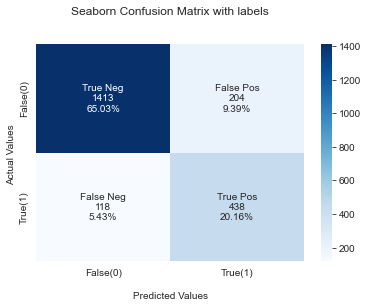

In [101]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, cb_pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False(0)','True(1)'])
ax.yaxis.set_ticklabels(['False(0)','True(1)'])

## Display the visualization of the Confusion Matrix.
plt.show()

### XGBoost Classifier

In [102]:
%%time

# XGBoost Classifier
xgb_model = XGBClassifier(scale_pos_weight= 3,
                          learning_rate = 0.1,
                          max_depth = 8,
                          random_state = 42)

xgb_model.fit(X_train, y_train)

# Make predictions
xgb_pred = xgb_model.predict(X_test)

# Check the f1 score of the model
print(f'XGBoost F1 score on the X_test is: {f1_score(y_test, xgb_pred)}\n')

[16:40:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost F1 score on the X_test is: 0.7262872628726287

Wall time: 36 s


In [103]:
# Evaluate the lgbm model f1 score metric
xgb_model.score(X_test, y_test)

0.8605614358030372

In [104]:
# let's get the predictions
xgb_pred = xgb_model.predict(X_train)
xgb_pred_test = xgb_model.predict(X_test)

print('XGBoost train f1 score: ', f1_score(y_train, xgb_pred))
print('XGBoost test f1 score: ', f1_score(y_test, xgb_pred_test))

XGBoost train f1 score:  0.9910529938059188
XGBoost test f1 score:  0.7262872628726287


In [105]:
xgb_pred_proba = xgb_model.predict_proba(X_test)[:,1]
xgb_pred_proba[:10]

array([0.79991084, 0.00404359, 0.10148815, 0.03043836, 0.00877827,
       0.94479954, 0.00441023, 0.00188334, 0.01486429, 0.00854274],
      dtype=float32)

In [106]:
xgb_pred_test[:10]

array([1., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [107]:
np.array(y_test)[:10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [108]:
print('Precision Score: ', round(precision_score(y_test, xgb_pred_test), 5))
print('Recall Score: ', round(recall_score(y_test, xgb_pred_test), 5))
print('F1 Score: ', round(f1_score(y_test, xgb_pred_test), 5))
print('Accuracy Score: ', round(accuracy_score(y_test, xgb_pred_test), 5))
print('ROC AUC: ', round(roc_auc_score(y_test, xgb_pred_test), 5))

Precision Score:  0.72958
Recall Score:  0.72302
F1 Score:  0.72629
Accuracy Score:  0.86056
ROC AUC:  0.81544


In [109]:
print(classification_report(y_test, xgb_pred_test))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      1617
         1.0       0.73      0.72      0.73       556

    accuracy                           0.86      2173
   macro avg       0.82      0.82      0.82      2173
weighted avg       0.86      0.86      0.86      2173



[[1468  149]
 [ 154  402]]


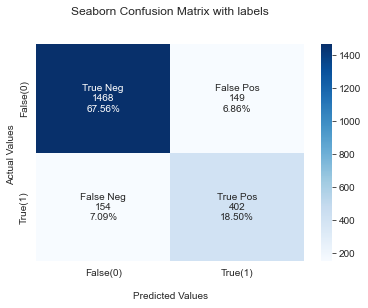

In [110]:
# Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, xgb_pred_test)
print(cf_matrix)

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False(0)','True(1)'])
ax.yaxis.set_ticklabels(['False(0)','True(1)'])

## Display the visualization of the Confusion Matrix.
plt.show()

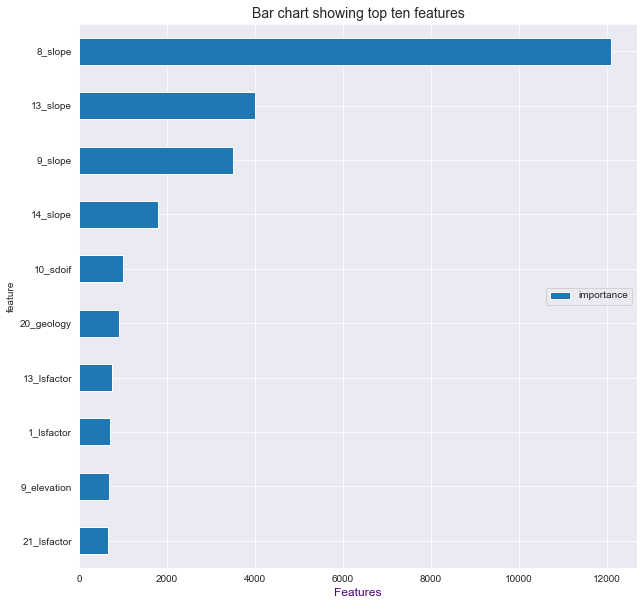

In [111]:
# Feature importance
impo_df = pd.DataFrame({'feature': X.columns, 'importance': model.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:10].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10))
plt.legend(loc = 'center right')
plt.title('Bar chart showing top ten features', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

<a name = "Predictions"></a>
## 10. Test set predictions

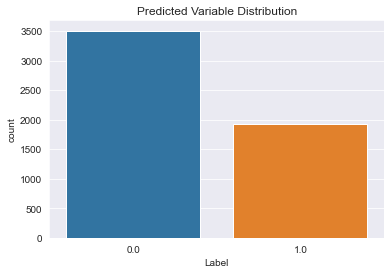

In [112]:
# Make prediction on the test set
test_df = test[main_cols]
predictions = model.predict(test_df)

# Create a submission file
sub_file = pd.DataFrame({'Sample_ID': test.Sample_ID, 'Label': predictions})

# Check the distribution of your predictions
sns.countplot(x = sub_file.Label)
plt.title('Predicted Variable Distribution');

<a name = "Submission"></a>
## 11. Creating a submission file

In [113]:
# Create a csv file and upload to zindi 
sub_file.to_csv('Second_Baseline.csv', index = False)
sub_file.head()

,Sample_ID,Label
10864,10865,1.0
10865,10866,0.0
10866,10867,0.0
10867,10868,1.0
10868,10869,1.0
